In [43]:
#insert all packages needed
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the smiles list
file_name = "C:/Users/fleur/Documents/Tue/Jaar_3/Q4/Advanced_programming/Advanced-programming/tested_molecules-1.csv"
with open(file_name, "r") as ins:
    smiles = []
    for line in ins:
        smiles.append(line.split('\n')[0])
print('# of SMILES:', len(smiles))

# of SMILES: 1001


In [14]:
#split the csv file into multiple columns
#read the dataframe
df = pd.read_csv(file_name)

#split the dataframe
new_columns = df['SMILES;ALDH1-inhibitor'].str.split(';', expand=True)
df_molecules = pd.concat([df, new_columns], axis=1)

#drop the original column
df_molecules = df_molecules.drop('SMILES;ALDH1-inhibitor', axis=1)

#rename the column names 
df_molecules = df_molecules.rename(columns={0:'SMILES',1:'ALDH1-inhibitor'})


df_molecules

,SMILES,ALDH1-inhibitor
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1
...,...,...
995,COc1ccc(N2C(=O)CC([NH2+]C3CC3)C2=O)cc1,0
996,CCNc1oc(COc2cccc(C)c2)nc1C#N,0
997,NC(=O)Cn1cnc(-c2ccccc2)c1,0
998,Cc1cc(NC(=O)CSc2nc3c(c(=O)n(C)c(=O)n3C)n2C(C)C...,0


In [29]:
#since the list is very large, to try stuff out, we look at the first 4 smiles
only_smiles_list = df_molecules['SMILES']

smiles_tryout = only_smiles_list[2:6]

2    Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...
3                    CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1
4    CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21
5    CC1CCCCN1S(=O)(=O)c1ccc(NC(=O)c2cccc(-n3cnnn3)...
Name: SMILES, dtype: object

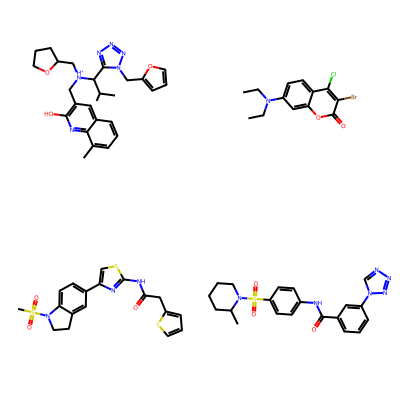

In [34]:
#draw the four mole images
mols = [Chem.MolFromSmiles(smi) for smi in smiles_tryout]
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))

In [35]:
#calculate descriptor list
desc_list = [n[0] for n in Descriptors._descList]
print(len(desc_list))
print(desc_list)

209
['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'Slog

In [37]:
#calculate molecular descriptors
calc = MoleculeDescriptors.MolecularDescriptorCalculator(desc_list)

rdkit_desc = [calc.CalcDescriptors(m) for m in mols]

print(len(rdkit_desc[0]))
print(rdkit_desc[0])

209
(10.90583730002561, 10.90583730002561, 0.01688087889476808, -0.01688087889476808, 0.38204304911555126, 477.58900000000017, 444.3250000000003, 477.26086533609003, 184, 0, 0.2199301244685873, -0.49290312186932855, 0.49290312186932855, 0.2199301244685873, 1.2285714285714286, 2.1142857142857143, 2.857142857142857, 16.492058241850845, 9.989822944902938, 2.3590464501093207, -2.3178984470624076, 2.2465447514302546, -3.124534681935073, 5.824876012288457, -0.9519121758151228, 3.5983196292280373, 1.5090093599125551, 1263.5817812853647, 24.363232072819912, 20.51592153294302, 20.51592153294302, 16.991203638441373, 12.321268845894942, 12.321268845894942, 9.787692611220175, 9.787692611220175, 6.864949294741381, 6.864949294741381, 5.211577957743416, 5.211577957743416, -3.3, 143670697.96060705, 23.44226553366444, 10.131416930737888, 5.058984413292813, 204.2657567351832, 19.160451016544577, 31.49848302436047, 6.041840829147961, 11.704392834435298, 0.0, 0.0, 0.0, 9.665781456092393, 0.0, 5.0986818083

In [46]:
df_molecules['rdkit_desc'] = rdkit_desc

ValueError: Length of values (4) does not match length of index (1000)

In [45]:
#make a violinplot

sns.violinplot(x='ALDH1-inhibitor', y='rdkit_desc', data=df_molecules)

ValueError: Could not interpret input 'rdkit_desc'